<img src="./images/window_seat.jpeg" width="90%"  align="center">
https://www.wotif.com/vc/blog/laughs/why-window-seat-best/amp/

<h1><center>MSIN0097: Predictive Analytics</center></h1>

<h1><center>Individual Coursework</center></h1>

<h1><center>Identification of dissatisfied passengers</center></h1>


<h3><center>4 March 2022</center></h3>

# Table of Contents
1. Introduction
    * 1.1 Business Problem
    * 1.2 Objective
2. Overview of Data
    * 2.1 Numerical Attributes
    * 2.2 Categorical Attributes
3. Data Exploration
    * 3.1 Rating Attributes
    * 3.2 Other Numerical Attributes
    * 3.3 Categorical Attributes
    * 3.4 Correlation Matrix
4. Data Preparation
5. Train Models
    * 5.1 Logistic Regression
    * 3.2 Decision Tree
    * 5.3 KNearest Neighbours
    * 5.4 Random Forest
    * 5.5 Voting Classifier   
6. Base Model Comparison on Train
7. FineTune Models
    * 7.1 Logistic Regression
    * 7.2 Decision Tree
    * 7.3 KNearest Neighbours
    * 7.4 Random Forest
    * 7.5 Voting Classifier  
8. Evaluate Base and Finetuned Models on Test
9. Conclusion
References





In [12]:
import warnings
warnings.simplefilter('ignore')


In [449]:
from wordcount import nb_word_count
nb_word_count("Final Predictive.ipynb") #with references and everything

2143

In [6]:
#upgrade matplotlib
#!pip install -U matplotlib

In [101]:
#upgrade scikit sklearn
#pip install -U scikit-learn

#### FACULTY NAME: FINAL PREDICTIVE 

# 1. Introduction

## 1.1 Context

The aviation industry is characterised by fierce competition due to the open sky policy. Since the airline industry is service-oriented, it is crucial for airlines to prioritize improving passengers’ satisfaction if they want to gain a competitive advantage (1).

Passenger satisfaction is a measurement that determines how well an airline's quality of services meet passenger expectations. 
Enhancing passenger satisfaction can lead to repeat purchase behaviour, favourable word-of-mouth communication, and ultimately boosted revenues (2). Apart from that it can develop an attachment with the airline which is particularly important since it is more expensive to acquire a new customer than to retain an existing one (3). Hence, passenger satisfaction can benefit the long term survival, profitability and sustained growth of an airline.

If a passenger has not been satisfied with the quality of the services of an airline, he might reconsider his buying decision and choose a competitor for their subsequent flights and it might lead to negative word-of-mouth communication and consequently reduced revenues. 

In this project, I am helping Invistico Airline by creating a model that can identify disatisfied customers. In that way, they can take proactive steps to improve a customer's satisfaction before it's too late to avoid the negative consequences. 

### 1.2 Objective

I will create a model that predicts if a customer was satisfied or dissatisfied without asking explicitly based on survey answers and some passenger and flight information.

The problem is a supepervised binary classification problem, so I am going to use different base models for classification (i.e. logistic regression, decision tree, knearest neighbours), as well as ensemble methods (i.e. random forest, voting classifier) to tackle it.


# 2. Overview of Data

The dataset consists of the details of passengers who have already flown with Invistico and it is accessible at the Kaggle's repository, https://www.kaggle.com/sjleshrac/airlines-customer-satisfaction.


In total, there are 22 feature columns and 1 binary outcome column. 
The feature columns include feedback of the passengers on various services in the form of rating, as well as flight and passenger information.


In [1]:
#imports libraries used
import pandas as pd
import numpy as np
%matplotlib inline  
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [27]:
#import dataset
dataset = pd.read_csv('/project/Invistico_Airline.csv')

In [444]:
#copy dataset and work on the copy
reviews = dataset.copy()

In [196]:
#inspect the first 5 rows of the dataset
reviews.head(5)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [445]:
#make aesthetic changes to column names
reviews.columns= reviews.columns.str.lower(
                ).str.replace('leg room service','leg_room_space', regex=True
                ).str.replace(' ','_', regex=True
                ).str.replace('-','_', regex=True
                ).str.replace('_in_minutes','', regex=True
                ).str.replace('departure/arrival','flight', regex=True)            

In [446]:
#count the number of rows and columns
print('The dataset has {0} rows and {1} columns'.format(reviews.shape[0],reviews.shape[1]))

The dataset has 129880 rows and 23 columns


In [199]:
#inspect information of the updated dataset

#convert the sum of null count to a df
null_count = pd.DataFrame(reviews.isnull().sum())

#rename the columns
null_count.rename(columns = {0:'null_count'}, inplace = True)

#add null_percentage, dtype unique_values_count and non_null_count attributes
null_count['null_percentage'] = round((null_count['null_count']/len(reviews))*100,1)
null_count['dtype'] = reviews.dtypes
null_count['unique_values_count'] = reviews.apply(lambda row: row.nunique(dropna = False)).to_frame()
non_null_count = len(reviews)-reviews.isnull().sum()

#reorder the columns
null_count.insert(0, 'non_null_count' , non_null_count)

#sort the df based on non_null_count
null_count=null_count.sort_values(by=['non_null_count'], ascending =False)

#show the table
null_count


,non_null_count,null_count,null_percentage,dtype,unique_values_count
satisfaction,129880,0,0.0,object,2
inflight_entertainment,129880,0,0.0,int64,6
departure_delay,129880,0,0.0,int64,466
online_boarding,129880,0,0.0,int64,6
cleanliness,129880,0,0.0,int64,6
checkin_service,129880,0,0.0,int64,6
baggage_handling,129880,0,0.0,int64,5
leg_room_space,129880,0,0.0,int64,6
on_board_service,129880,0,0.0,int64,6
ease_of_online_booking,129880,0,0.0,int64,6


## 2.1 Numerical Attributes

In [200]:
#inspect numerical attributes
reviews.describe()

,age,flight_distance,seat_comfort,flight_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,on_board_service,leg_room_space,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay,arrival_delay
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


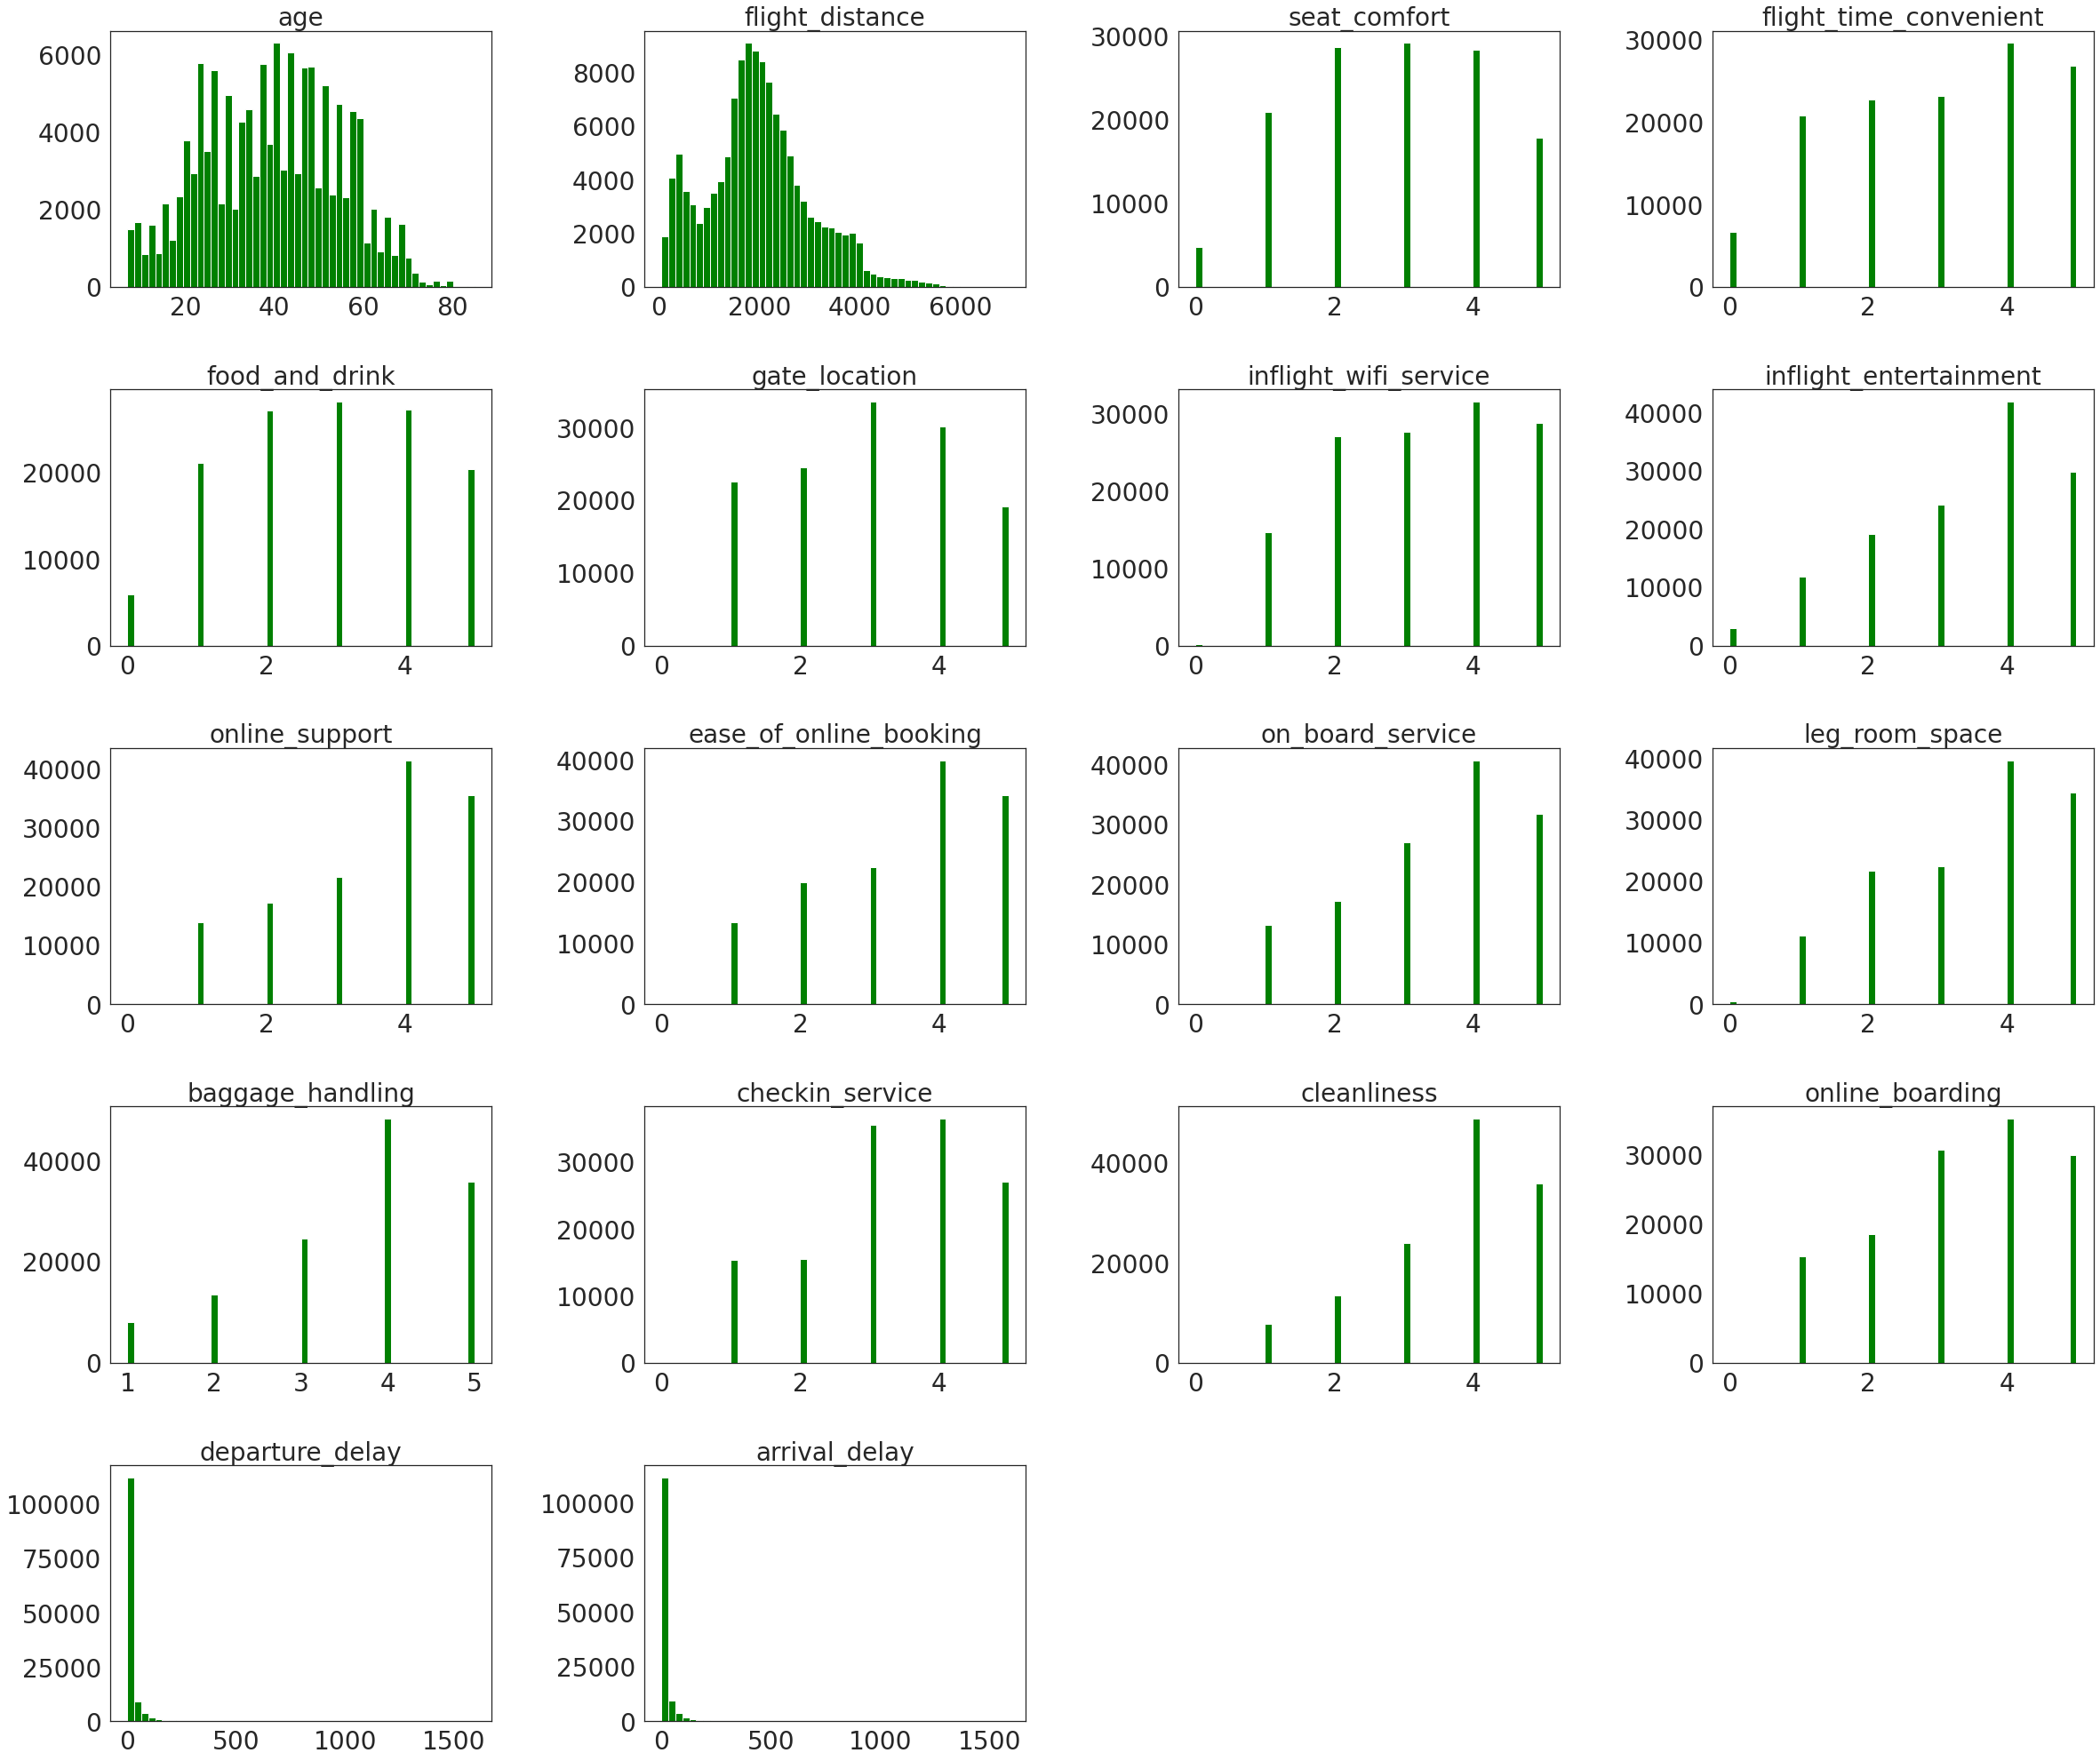

In [201]:
#plot the distributions of the numerical attributes
fig = reviews.hist(bins=50,  figsize=(40,35), grid=False, color = 'green')

#space out plots
plt.subplots_adjust(wspace=0.4,hspace=0.4)

#set the size of the title and the ticks for all subplots
for subplot in fig.ravel():
    subplot.title.set_size(28)
    subplot.tick_params(axis='both', which='major', labelsize=28)


#show the plots
plt.show()

## 2.2 Categorical Attributes

In [202]:
#inspect categorical attributes
for col in reviews:
    if is_numeric_dtype(reviews[col]) == False:
        print('Column:', col)
        print('Number of unique values:', reviews[col].nunique())
        percentage = reviews[col].value_counts(normalize=True,dropna = False).mul(100).round(1).astype(str) 
        print(percentage + '%' )
        print('')

Column: satisfaction
Number of unique values: 2
satisfied       54.7%
dissatisfied    45.3%
Name: satisfaction, dtype: object

Column: gender
Number of unique values: 2
Female    50.7%
Male      49.3%
Name: gender, dtype: object

Column: customer_type
Number of unique values: 2
Loyal Customer       81.7%
disloyal Customer    18.3%
Name: customer_type, dtype: object

Column: type_of_travel
Number of unique values: 2
Business travel    69.1%
Personal Travel    30.9%
Name: type_of_travel, dtype: object

Column: class
Number of unique values: 3
Business    47.9%
Eco         44.9%
Eco Plus     7.2%
Name: class, dtype: object



In [203]:
#change how some values are written 
reviews = reviews.applymap(lambda x: x.title() if type(x)==str else x)

Observations:

Our dataset is balanced we respect to the outcome column (55% and 45%) so there is no need to employ any balancing strategy.  

We only have some missing values in the arrival_delay column that we are going to deal with later.

# 3. Data Exploration

## 3.1 Rating Attributes

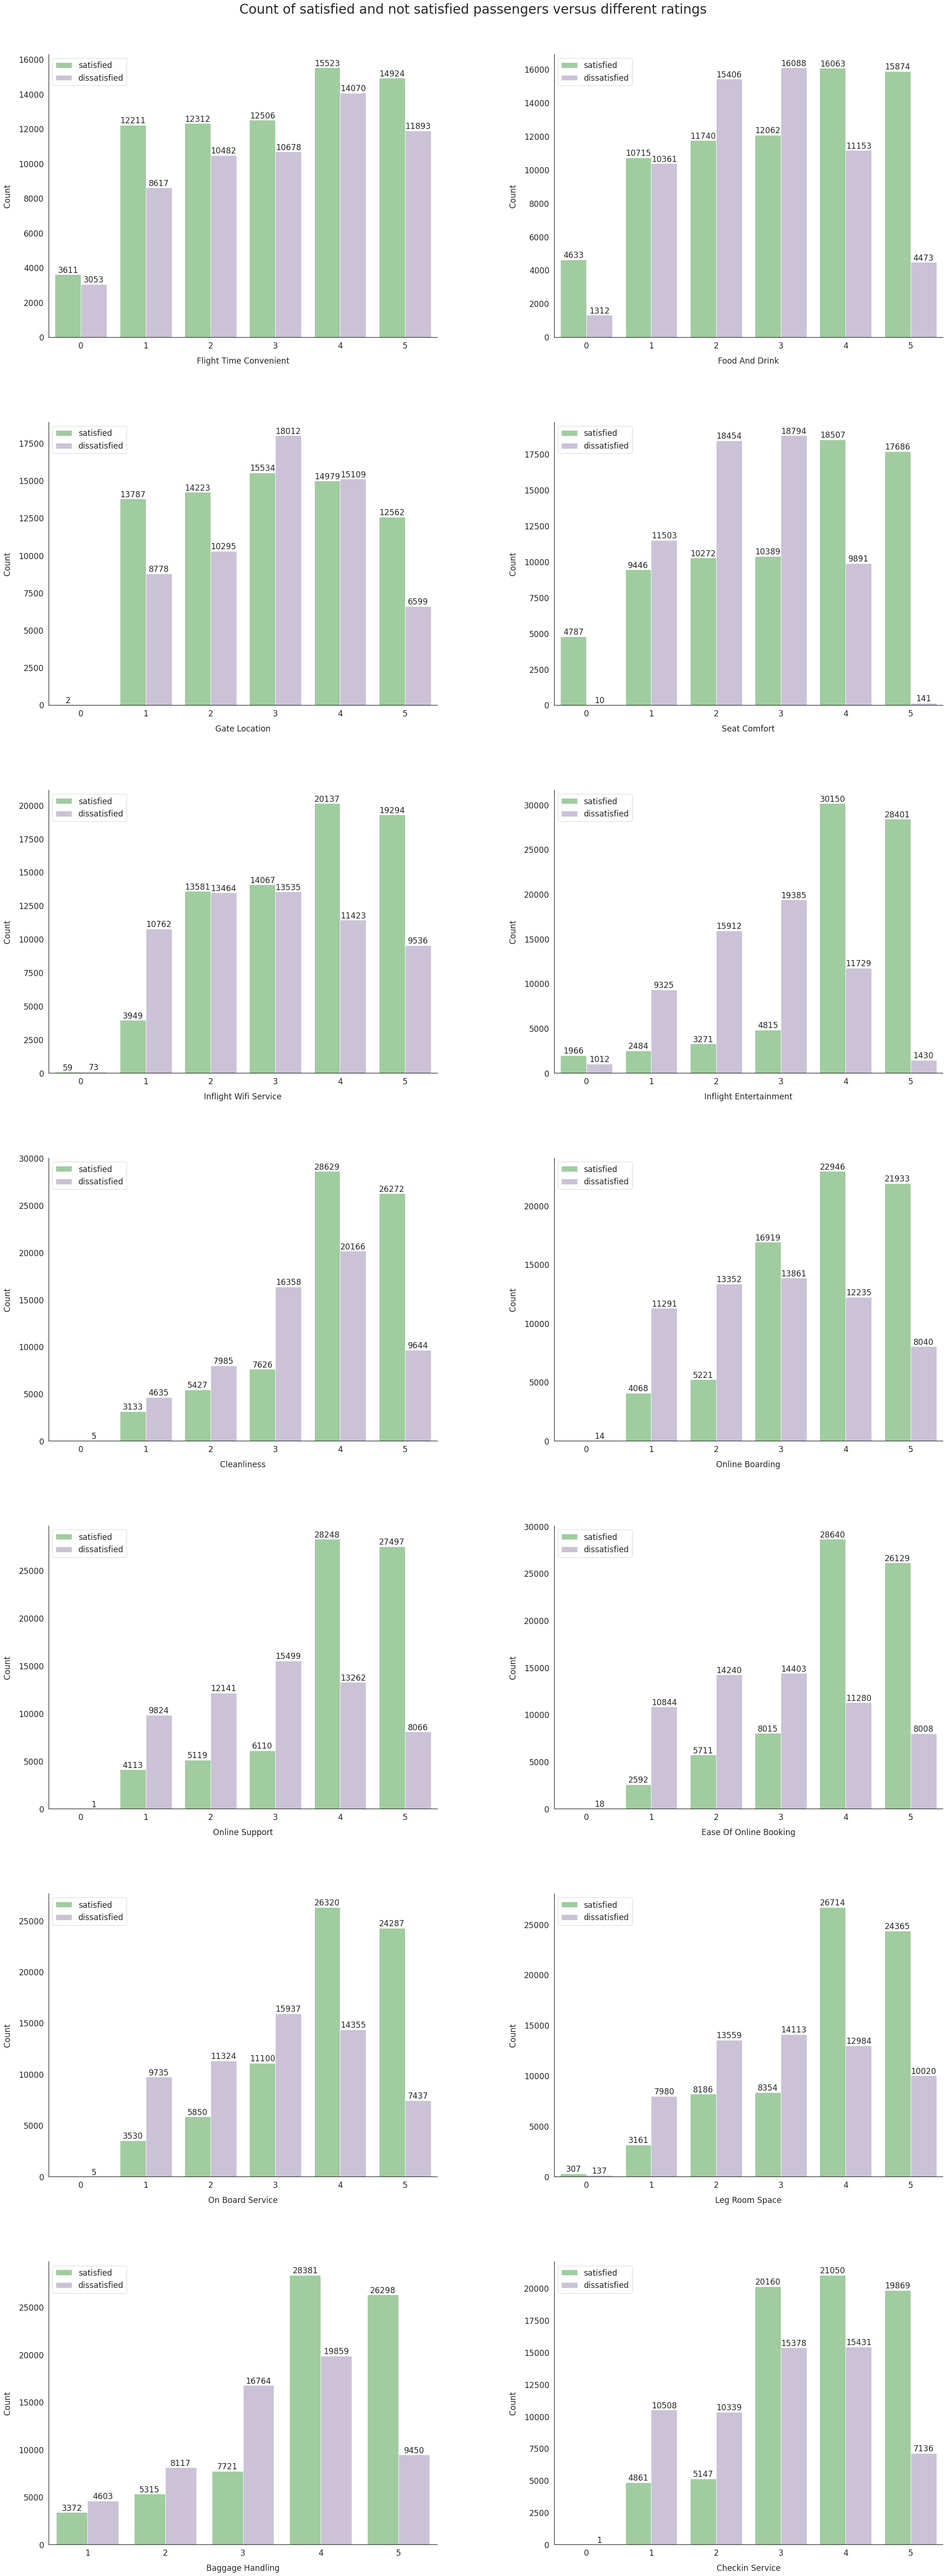

In [453]:
#incase plots don't run, install latest matplotlib

#create a list with all ratings
rating_vars = ['flight_time_convenient','food_and_drink',
                    'gate_location', 'seat_comfort','inflight_wifi_service',
                    'inflight_entertainment', 'cleanliness', 'online_boarding',
                    'online_support', 'ease_of_online_booking','on_board_service', 
                    'leg_room_space', 'baggage_handling', 'checkin_service']

#create layout of subplots
fig, ax = plt.subplots(7,2, figsize=(28, 75)) 

#add overall title
plt.suptitle("Count of satisfied and not satisfied passengers versus different ratings", y = 1.01, fontsize = 28);

#create function because it is going to be reused 
def create_countplots(lst_of_ratings, legend_position):
    
    #plot the counts of satisfied and not satisfied passengers of different ratings at different score ratings
    for variable, subplot in zip(lst_of_ratings, ax.ravel()):
        cnt = sns.countplot(x=variable, hue='satisfaction', data=reviews, ax=subplot , palette='Accent', alpha=0.8)

        #remove the top and right spines from plots
        sns.despine()

        #adjusts subplots so that they fit nicely in to the figure area
        fig.tight_layout()
        plt.subplots_adjust(wspace=0.3,hspace=0.3)

        #format the axes and labels for each subplot
        cnt.set_ylabel('Count',fontsize=17, labelpad = 14)
        cnt.set_xlabel(variable.title().replace('_', ' '), fontsize=17, labelpad = 14)
        
        #format the bar labels, legend and tick parameters for each subplot
        for container in cnt.containers:
            cnt.bar_label(container, fontsize=17)
            cnt.legend(loc=legend_position, fontsize=17)
            cnt.tick_params(axis='both', which='major', labelsize=17)

            
            
            
#show plots of first 8 ratings (i dont plot all because it doesnt show nice in the pdf)        
create_countplots(rating_vars,'upper left')


## 3.2 Other Numerical Attributes

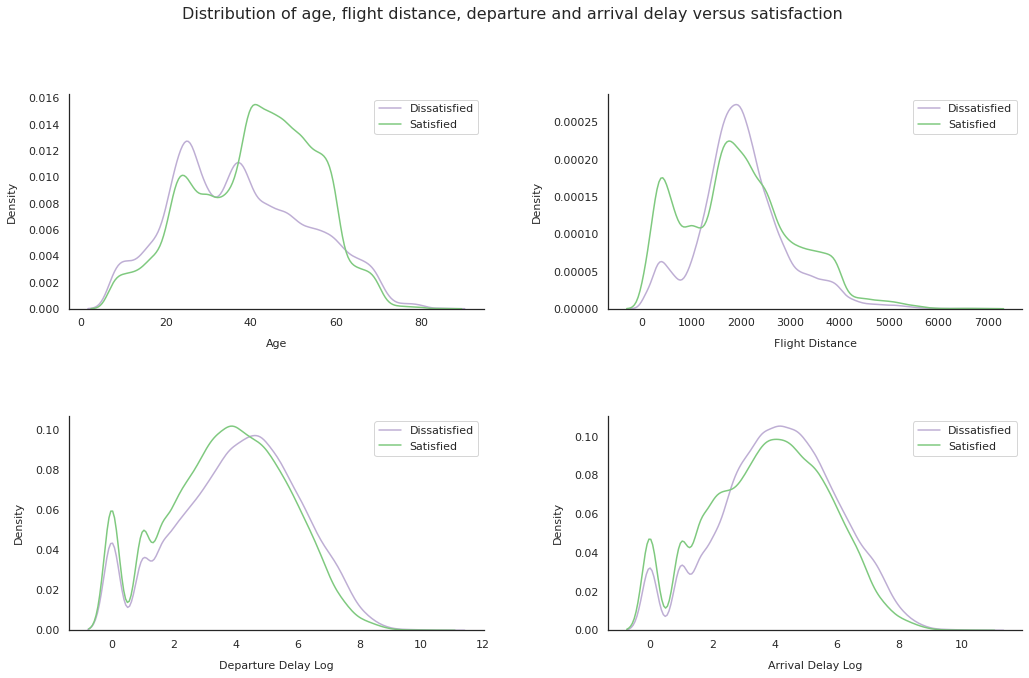

In [205]:
#since arrival_delay and departure_delay are very skewed, I am going to create temporary columns of
#the log transformation of delays to understand their distribution vs satisfaction
reviews['arrival_delay_log'] = np.log2(reviews['arrival_delay'].replace(0, np.nan))
reviews['departure_delay_log'] = np.log2(reviews['departure_delay'].replace(0, np.nan))

#create a list with the remaining numerical variables
other_num_vars = ['age', 'flight_distance', 'departure_delay_log', 'arrival_delay_log']

#create layout of subplots
fig, ax = plt.subplots(2,2, figsize=(15, 10))

#add overall title
plt.suptitle("Distribution of age, flight distance, departure and arrival delay versus satisfaction ", y = 1.01, fontsize = 16);

#plot the distribution of each numerical attribute versus satisfaction
for variable, subplot in zip(other_num_vars, ax.ravel()):
    plot_kde = sns.kdeplot(x=variable, hue='satisfaction',  data=reviews, ax=subplot, palette='Accent', alpha=0.8)

    #adjusts subplots so that they fit nicely in to the figure area
    fig.tight_layout(w_pad=1, h_pad=1)
    plt.subplots_adjust(wspace=0.3,hspace=0.5)
    
    #remove the top and right spines from plots
    sns.despine()
    
    #format the axis, legend and tick parameters for each subplot
    subplot.set_ylabel('Density',fontsize=11, labelpad = 11)
    subplot.set_xlabel(variable.title().replace('_', ' '), fontsize=11, labelpad = 11)
    plot_kde.legend(['Dissatisfied', 'Satisfied'], fontsize=11, loc='best')
    subplot.tick_params(axis='both', which='major', labelsize=11)


#drop the temporary columns
reviews = reviews.drop(["arrival_delay_log","departure_delay_log"], axis=1)


## 3.3 Categorical Attributes

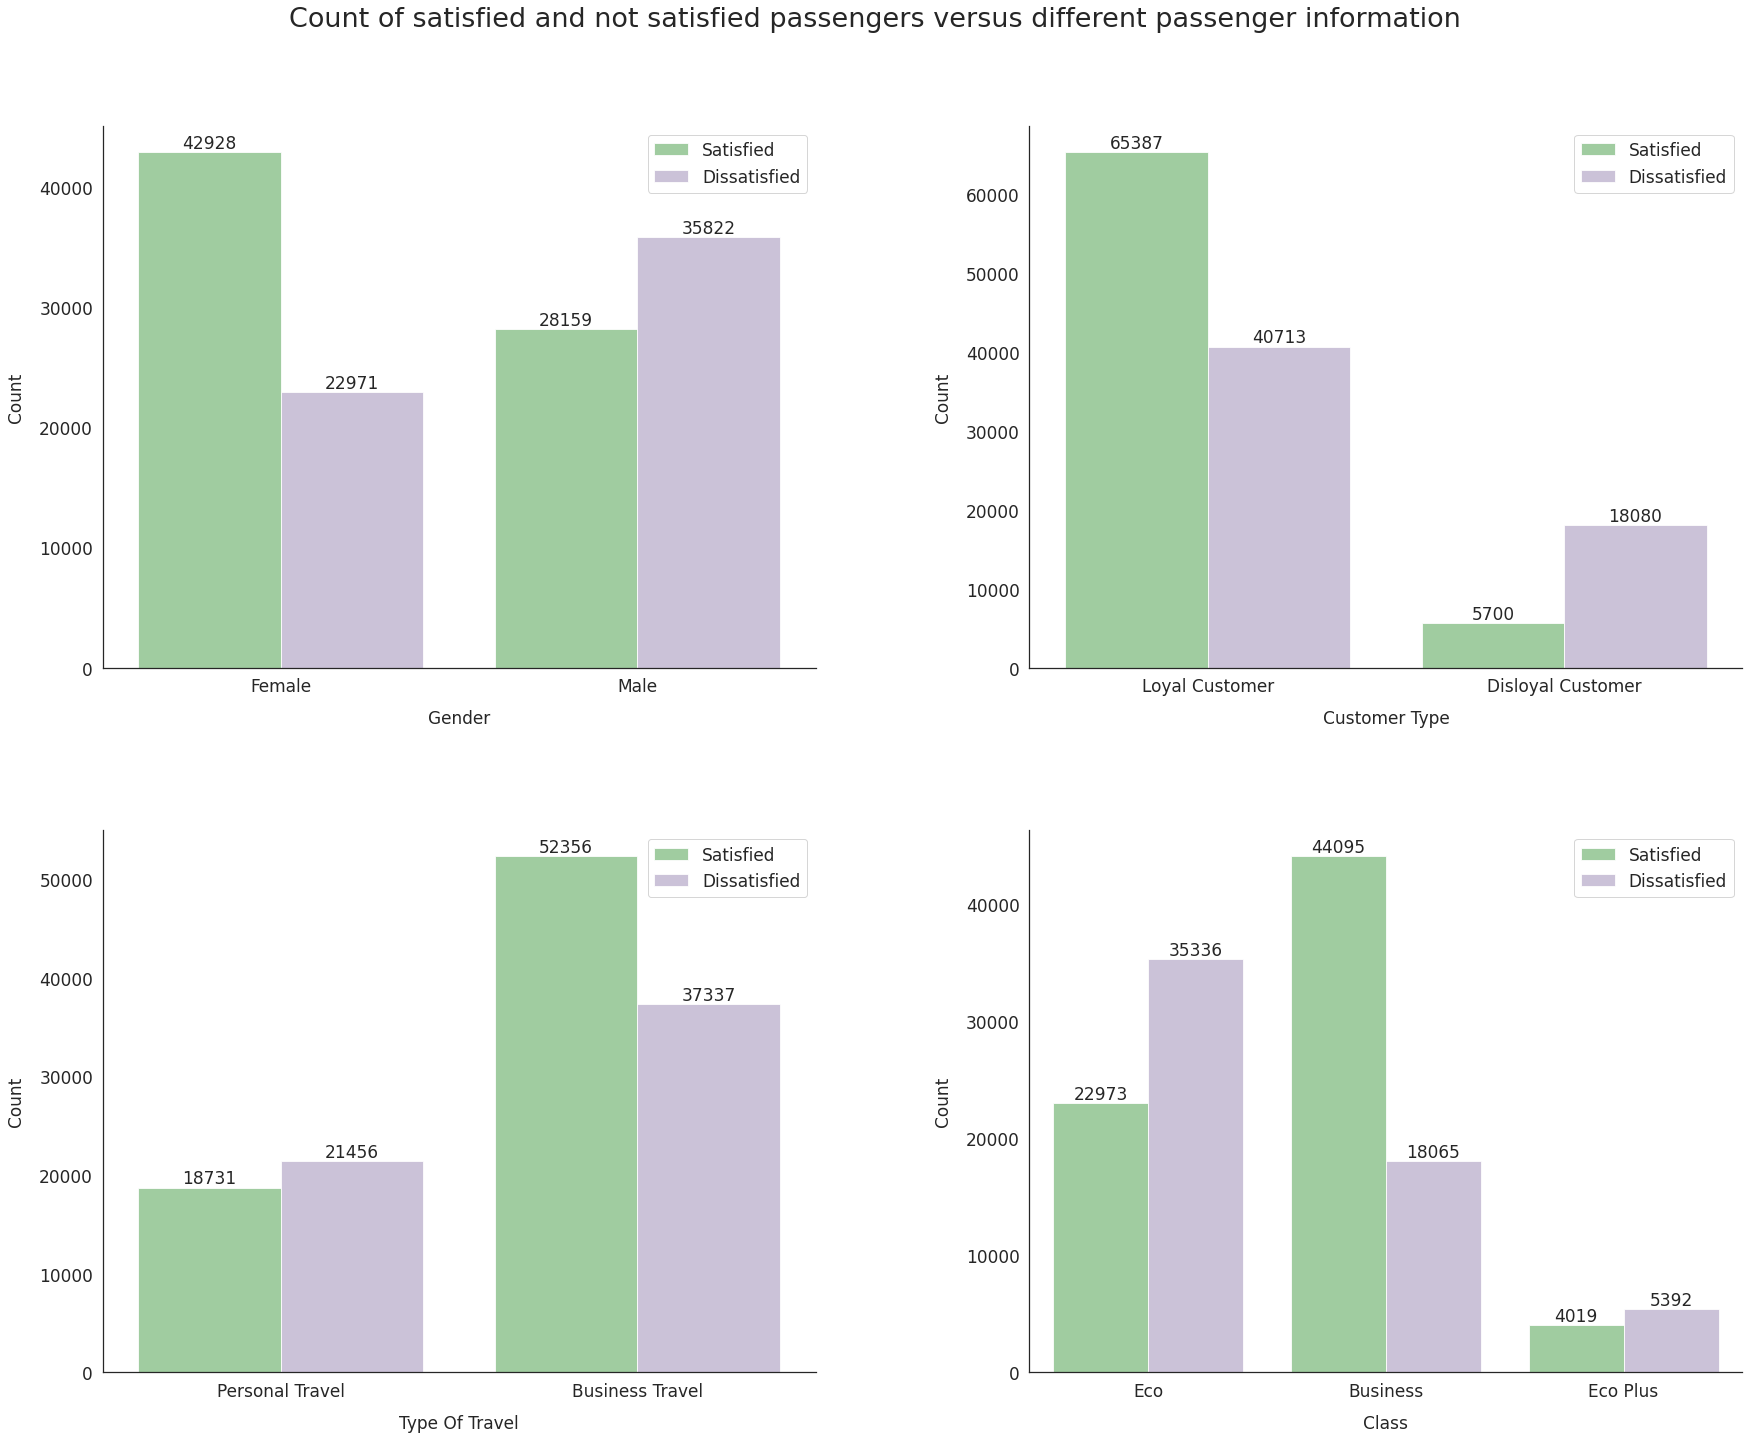

In [206]:
#create layout of subplots
fig, ax = plt.subplots(2,2, figsize=(25, 20))

#create a list with the categorical attributes to visualise
categorical_vars = ['gender', 'customer_type', 'type_of_travel', 'class']

#add overall title
plt.suptitle("Count of satisfied and not satisfied passengers versus different passenger information", y = 1.02, fontsize = 27);


create_countplots(categorical_vars,'best')



## 3.4 Correlation Matrix

In [207]:
#copy the dataset and convert it to 'heatmap friendly' (i.e. convert the categorical values to numerical)
#if a categorical attribute has only two outputs, replace the outputs with 0 and 1 (space purposes)
#else get dummies 
reviews_corr = reviews.copy()
reviews_corr["satisfaction"].replace({'Satisfied': 1,  'Dissatisfied': 0}, inplace=True)
reviews_corr["gender"].replace({'Female': 1,  'Male': 0}, inplace=True)
reviews_corr["customer_type"].replace({'Loyal Customer': 1,  'Disloyal Customer': 0}, inplace=True)
reviews_corr["type_of_travel"].replace({'Personal Travel': 1,  'Business Travel': 0}, inplace=True)
reviews_corr["class"].replace({'class_Business': 0,  'class_Eco': 1,'class_Eco':2}, inplace=True)




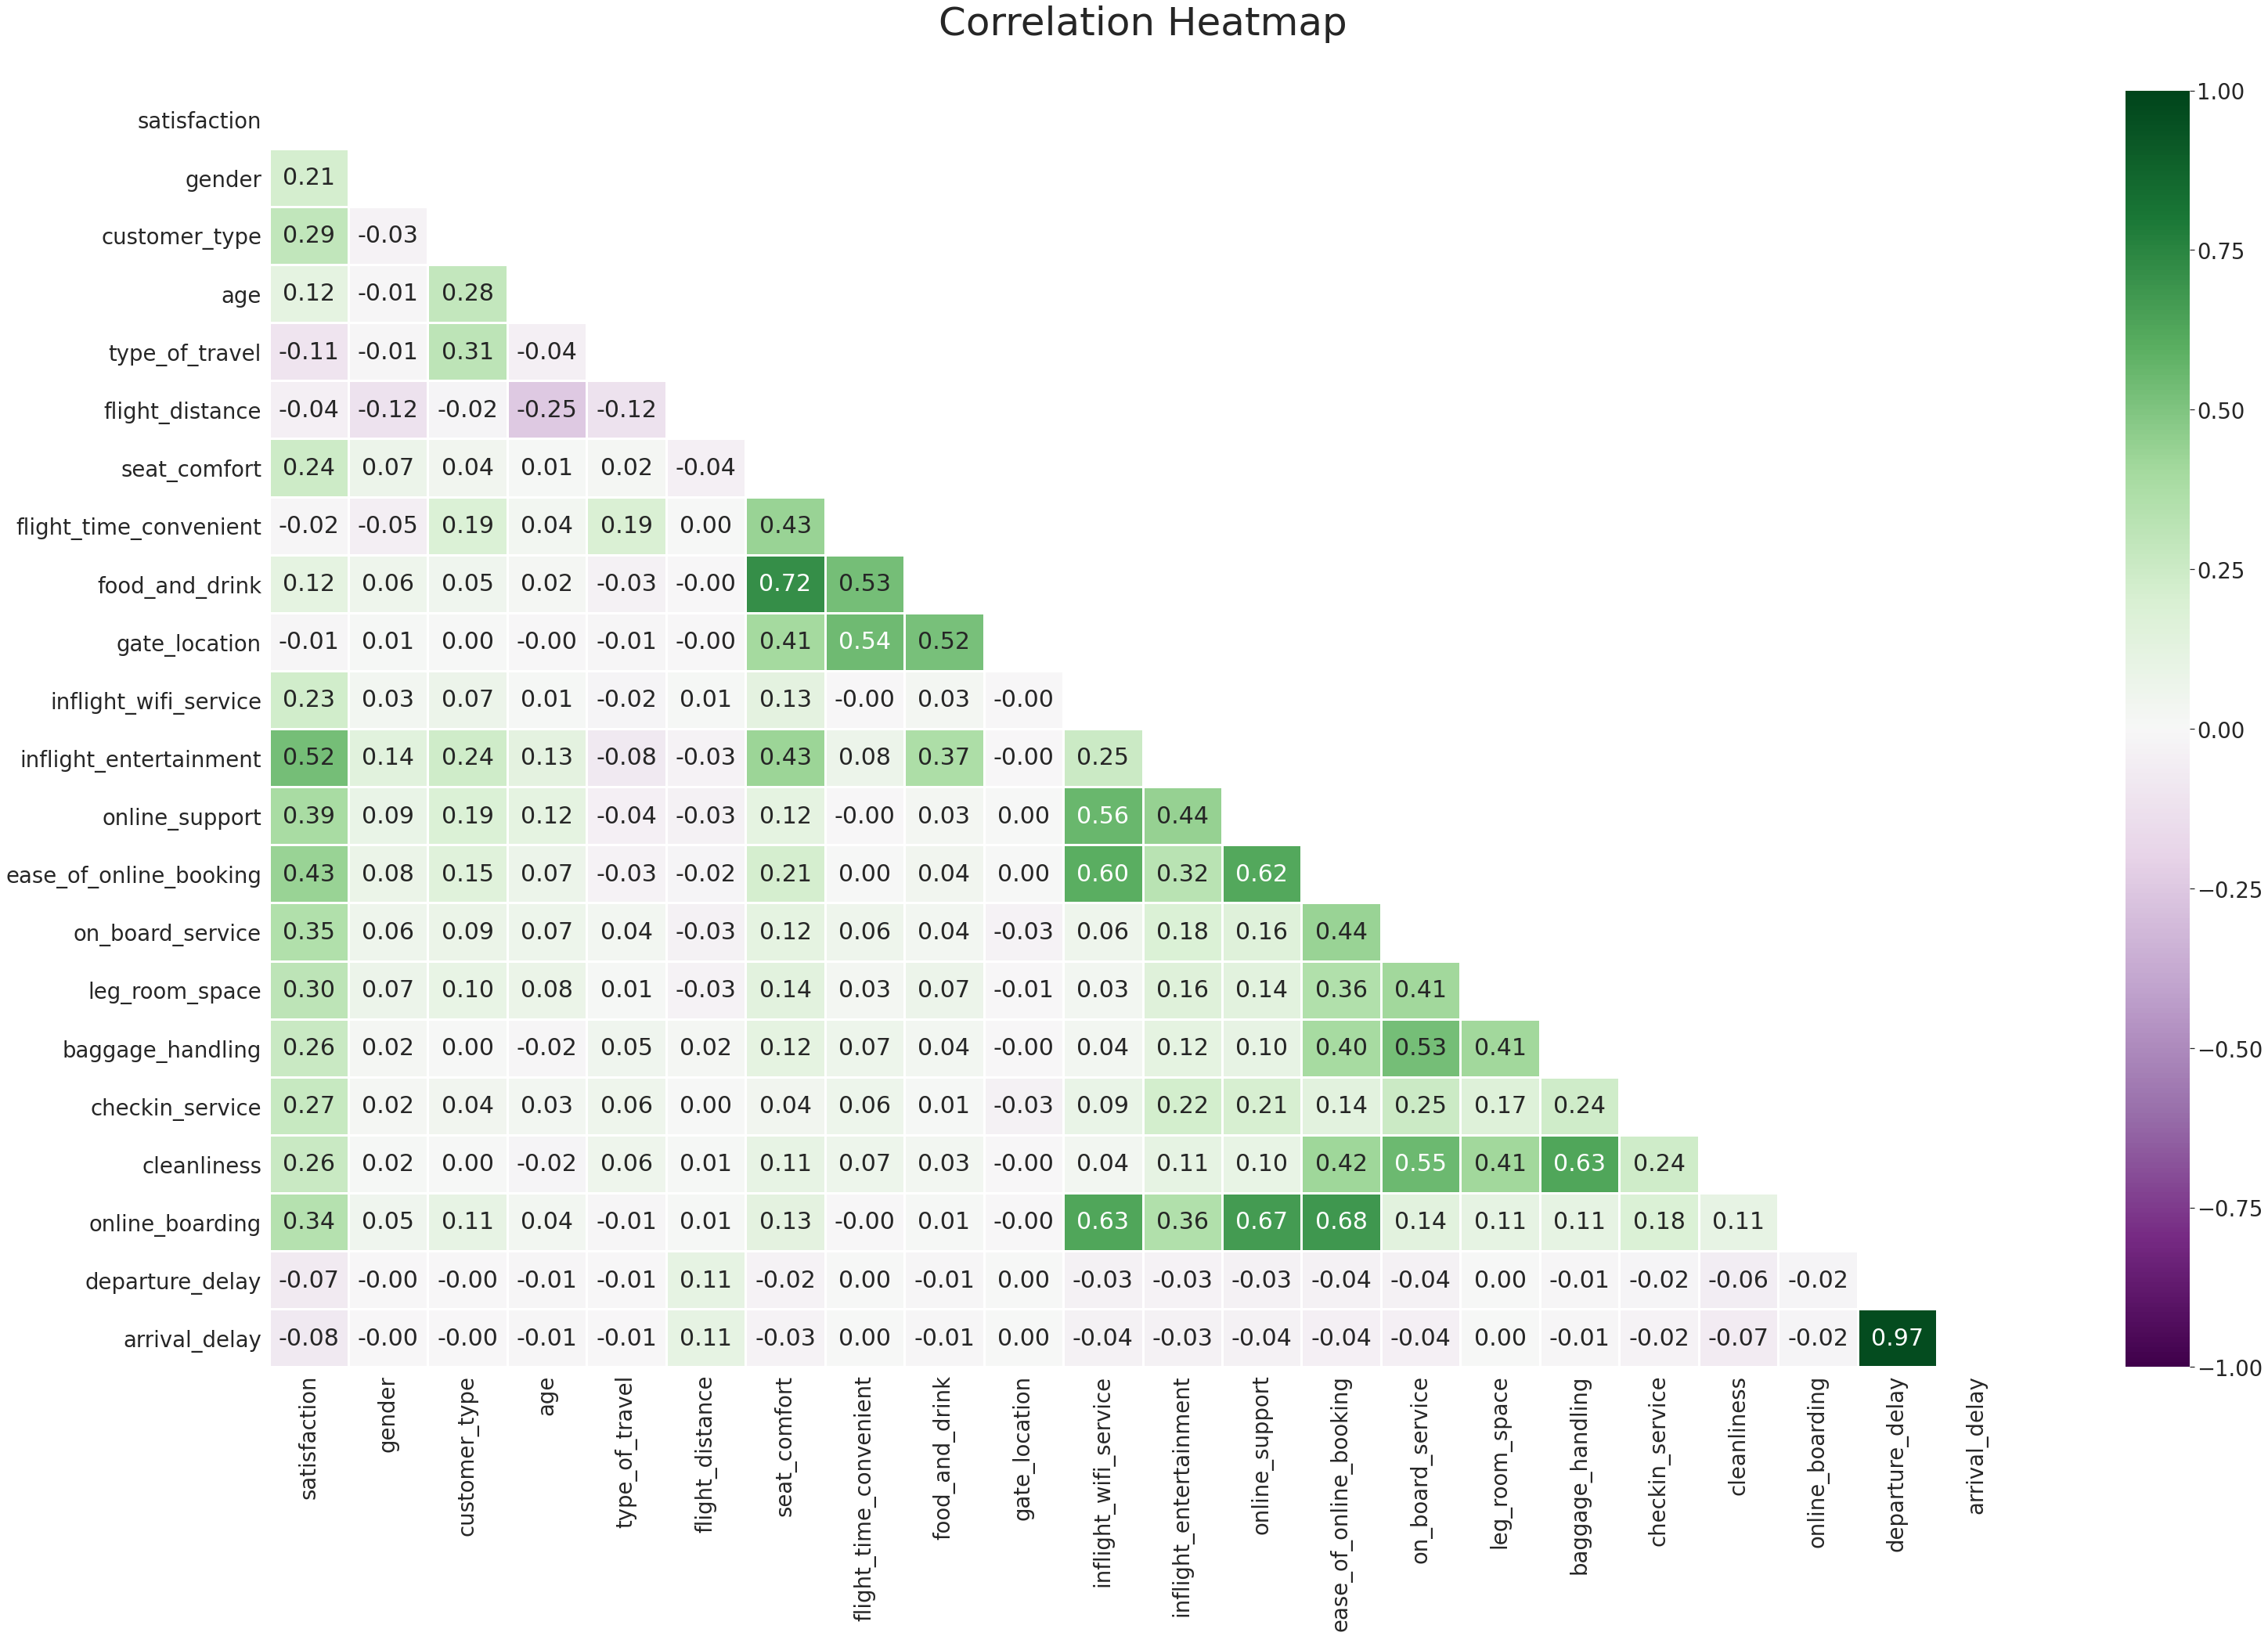

In [208]:
#compute pairwise correlation of columns, excluding nan values
corr_matrix = reviews_corr.corr()

#set figure size
fig = plt.figure(figsize=[50,30])

#set aesthetic parameters
sns.set(style='white',font_scale=2.5)

#create the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='PRGn',linewidth=3,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')

#add overall title
plt.title('Correlation Heatmap',fontsize=50, y = 1.04)

#show plot
plt.show()

In [209]:
#show the absolute correlation of featuers with the output column
abs(reviews_corr.corr()['satisfaction']).sort_values(ascending=False)

satisfaction              1.000000
inflight_entertainment    0.523496
ease_of_online_booking    0.431772
online_support            0.390143
on_board_service          0.352047
online_boarding           0.338147
leg_room_space            0.304928
customer_type             0.292592
checkin_service           0.266179
baggage_handling          0.260347
cleanliness               0.259330
seat_comfort              0.242384
inflight_wifi_service     0.227062
gender                    0.212236
food_and_drink            0.120677
age                       0.117971
type_of_travel            0.109239
arrival_delay             0.080691
departure_delay           0.073909
flight_distance           0.039224
flight_time_convenient    0.015507
gate_location             0.012071
Name: satisfaction, dtype: float64

It is observed that there is 0.97 correlation between arrival and departure delay, so I will drop one of those features. I decide to keep arrival delay because it has a higher correlation with satisfaction.




# 4. Data Preparation

In [38]:
#replace the outcome values with 1 for satisfied and 0 for disatisfied
reviews['satisfaction'] = reviews['satisfaction'].replace(['Satisfied', 'Dissatisfied'], [1,0])

#fill missing values in arrival_delay with values in departure delay since they have 0.97 correlation
reviews["arrival_delay"].fillna(reviews["departure_delay"], inplace=True)

#drop departure column
reviews = reviews.drop(['departure_delay'], axis=1) 

In [39]:
#split the test set (30%) and training set (70%)
train, test = train_test_split(reviews, test_size=0.3, random_state=333)

print('The train dataset has {0} rows and {1} columns.'.format(train.shape[0],train.shape[1]))
print('The test dataset has {0} rows and {1} columns.'.format(test.shape[0],test.shape[1]))


The train dataset has 90916 rows and 22 columns.
The test dataset has 38964 rows and 22 columns.


In [40]:
#feature observations of train set
X_train_pre = train.drop("satisfaction", axis=1) # drop labels for training set

#labels of train set
y_train = train["satisfaction"].copy()

In [41]:
#feature observations of test set
X_test_pre = test.drop("satisfaction", axis=1) # drop labels for test set

#labels of test set
y_test = test["satisfaction"].copy()

In [42]:
#create a list with all the numerical attributes
num_attribs = list(X_train_pre.select_dtypes(include=[np.number]))

#create a list with all categorical attributes
cat_attribs = list(X_train_pre[['gender','customer_type','type_of_travel','class']])

#create a pipeline for numerical attributes to scale them
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())  ])

#create a pipeline for categorical attributes to hot encode them
cat_pipeline = Pipeline([
       ('cat_encoder', OneHotEncoder(sparse=False)) ])

#merge the two pipelines in one
preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)  ])


# 5. Models

As mentioned earlier, the models that I chose for the supervised binary classification problem are: logistic regression- which is a good baseline for classification problems, decision tree, knearest neighbours, random forest, voting classifer.

In order to evaluate the models I use 3-fold cross validation as shown in the figure below. That means that the training set is randomly split into 3 folds.  It then trains and evaluates the performance of the model 3 times, picking a different fold for evaluation every time and training on the remaining 2 folds. I chose to do a 3-fold cross validation and not 10 which is the most common to save computational time because I have a big training set.

Once cross-validation is over, I calculate the mean (f1, precision, recall, accuracy) ± stdev of the 3 evaluation scores.


**Fig1: 3-Fold Cross Validation**
<img src="./images/Fig1.png" width="90%"  align="center">


In our business problem we want to have high recall because we want to be able to spot as many dissatisfied passengers as possible. However, since the aim is to identify dissatisfied passengers and target them accordingly with vouchers or free upgrades, we also care about precision (targeting each passenger will cost money to the airline). 

Therefore, F1 seems the most appropriate performance measure to compare the models, because it is the harmonic mean of those two metrics. Accuracy and roc auc score will also be calculated.


In [357]:
#create function to avoid repetition
def get_cross_eval_scores(clf, X_train, y_train):
    # calculate f1 score
    f1 = cross_val_score(clf, X_train, y_train, scoring='f1', cv=3)
    f1_score = f1.mean()
    f1_std = f1.std()
    print("F1 Score Mean: {0:.3f} ± {1:.3f}".format(f1_score,f1_std))
    
    # calculate precision score
    precision = cross_val_score(clf, X_train, y_train, scoring='precision', cv=3)
    precision_score = precision.mean()
    precision_std = precision.std()
    print("Precision Score Mean: {0:.3f} ± {1:.3f}".format(precision_score,precision_std))

    # calculate recall score
    recall = cross_val_score(clf, X_train, y_train, scoring='recall', cv=3)
    recall_score = recall.mean()
    recall_std = recall.std()
    print("Recall Mean: {0:.3f} ± {1:.3f}".format(recall_score,recall_std))
    
    # calculate accuracy score 
    accuracy = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=3)
    accuracy_score = accuracy.mean()
    accuracy_std = accuracy.std()
    print("Accuracy Mean: {0:.3f} ± {1:.3f}".format(accuracy_score,accuracy_std))

    return  f1_score, precision_score, recall_score,accuracy_score


def plot_confusion_matrix_(y_train, y_pred):
    print('Confusion Matrix:\n')
    
    #set the size of the plot
    plt.figure(dpi=60) 
    
    #create the confusion matrix heatmap
    confusion_mat = confusion_matrix(y_train, y_pred)
    ax = sns.heatmap(confusion_mat, annot=True, fmt='d', cmap = 'Greens',annot_kws={"size": 12}) 
   
    #fix labels and tick params
    plt.xlabel('Prediction',fontsize=12, labelpad=10)
    plt.ylabel('Actual',fontsize=12,  labelpad=10)
    ax.tick_params(axis='both', which='major', labelsize=11)
    
    #show plot
    plt.show()

def plot_roc_curve_(y_train, y_pred):
    print('ROC curve:\n')
    
    #calculate the auc score
    auc = roc_auc_score(y_train, y_pred)
    
    #compute roc_curve
    fpr, tpr, thresholds = roc_curve(y_train,y_pred)
    
    #set the size of the plot
    plt.figure(dpi=60)
    
    #plot the graph
    plt.plot(fpr, tpr,linewidth=2,color = 'g',label='AUC={:.3f}'.format(roc_auc_score(y_train, y_pred)))
    plt.plot([0, 1], [0, 1], 'k--', c ='mediumpurple')
    
    #fix axis parameters 
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc="lower right",fontsize=12)
    plt.xlabel('False Positive Rate',fontsize=12, labelpad=10)
    plt.ylabel('True Positive Rate',fontsize=12, labelpad=10)
    
    #remove the top and right spines from plots
    sns.despine()
    return auc



## 5.1 Logistic Regression

F1 Score Mean: 0.850 ± 0.001
Precision Score Mean: 0.849 ± 0.001
Recall Mean: 0.851 ± 0.003
Accuracy Mean: 0.836 ± 0.001
Confusion Matrix:



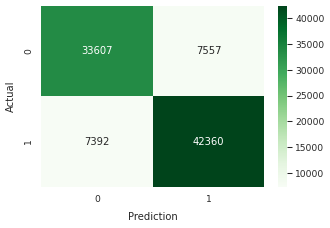

ROC curve:



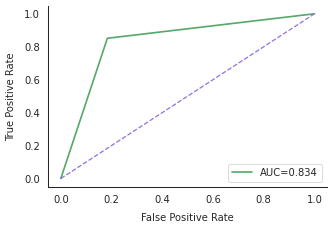

In [359]:
# create a pipeline that prepares the data and runs the model
preprocess_and_logit_pipeline = Pipeline([
        ('preparation', preprocess_pipeline),
        ('model', LogisticRegression(random_state=2))  ])

#evaluation scores from the training set
f1_logit, precision_logit, recall_logit, accuracy_logit = get_cross_eval_scores(preprocess_and_logit_pipeline, X_train_pre, y_train)

#perform 3-fold cross validation and return predictions made on each test fold
y_pred_logit = cross_val_predict(preprocess_and_logit_pipeline, X_train_pre, y_train, cv=3)

# plot confusion matrix by comparing predicitons to the actual targets
plot_confusion_matrix_(y_train, y_pred_logit)

# plot ROC curve and get ROC AUC score
auc_logit = plot_roc_curve_(y_train, y_pred_logit)

## 5.2 Decision Tree

F1 Score Mean: 0.942 ± 0.001
Precision Score Mean: 0.939 ± 0.002
Recall Mean: 0.945 ± 0.002
Accuracy Mean: 0.936 ± 0.001
Confusion Matrix:



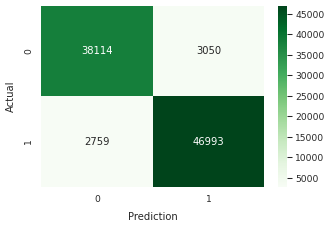

ROC curve:



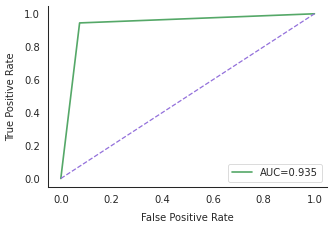

In [360]:
# create a pipeline that prepares the data and runs the model
preprocess_and_dt_pipeline = Pipeline([
        ('preparation', preprocess_pipeline),
        ('model', DecisionTreeClassifier(random_state=2))  ])

#evaluation scores from the training set
f1_dt, precision_dt, recall_dt, accuracy_dt = get_cross_eval_scores(preprocess_and_dt_pipeline, X_train_pre, y_train)

#perform 3-fold cross validation and return mean scores of predictions made on the test folds
y_pred_dt = cross_val_predict(preprocess_and_dt_pipeline, X_train_pre, y_train, cv=3)

# plot confusion matrix by comparing predicitons to the actual targets
plot_confusion_matrix_(y_train, y_pred_dt)

# plot ROC curve and get ROC AUC score
auc_dt = plot_roc_curve_(y_train, y_pred_dt)

## 5.3 KNN

F1 Score Mean: 0.925 ± 0.002
Precision Score Mean: 0.943 ± 0.000
Recall Mean: 0.908 ± 0.003
Accuracy Mean: 0.920 ± 0.002
Confusion Matrix:



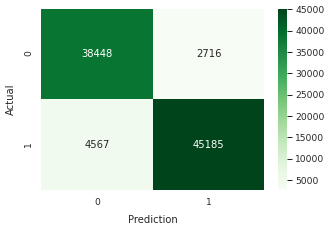

ROC curve:



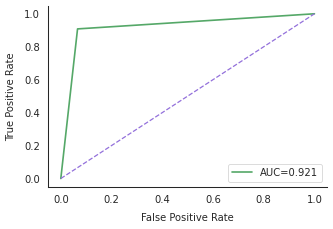

In [361]:
# create a pipeline that prepares the data and runs the model
preprocess_and_knn_pipeline = Pipeline([
        ('preparation', preprocess_pipeline),
        ('model', KNeighborsClassifier())  ])

#evaluation scores from the training set
f1_knn, precision_knn, recall_knn, accuracy_knn = get_cross_eval_scores(preprocess_and_knn_pipeline, X_train_pre, y_train)

#perform 3-fold cross validation and return predictions made on each test fold
y_pred_knn = cross_val_predict(preprocess_and_knn_pipeline, X_train_pre, y_train, cv=3)

# plot confusion matrix by comparing predicitons to the actual targets
plot_confusion_matrix_(y_train, y_pred_knn)

# plot ROC curve and get ROC AUC score
auc_knn = plot_roc_curve_(y_train, y_pred_knn)

## 5.4 Random Forest

F1 Score Mean: 0.960 ± 0.001
Precision Score Mean: 0.965 ± 0.001
Recall Mean: 0.954 ± 0.002
Accuracy Mean: 0.956 ± 0.001
Confusion Matrix:



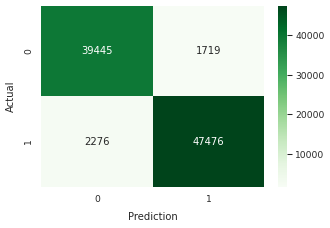

ROC curve:



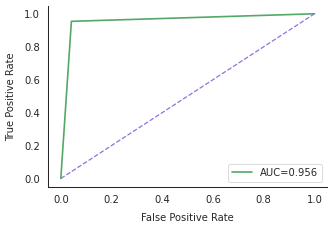

In [362]:
# create a pipeline that prepares the data and runs the model
preprocess_and_rf_pipeline = Pipeline([
        ('preparation', preprocess_pipeline),
        ('model', RandomForestClassifier(random_state=2))  ])

#evaluation scores from the training set
f1_rf, precision_rf, recall_rf, accuracy_rf = get_cross_eval_scores(preprocess_and_rf_pipeline, X_train_pre, y_train)

#perform 3-fold cross validation and return predictions made on each test fold
y_pred_rf = cross_val_predict(preprocess_and_rf_pipeline, X_train_pre, y_train, cv=3)

# plot confusion matrix by comparing predicitons to the actual targets
plot_confusion_matrix_(y_train, y_pred_rf)

# plot ROC curve and get ROC AUC score
auc_rf = plot_roc_curve_(y_train, y_pred_rf)

## 5.6 Voting Classifier

F1 Score Mean: 0.951 ± 0.001
Precision Score Mean: 0.955 ± 0.001
Recall Mean: 0.946 ± 0.002
Accuracy Mean: 0.946 ± 0.001
Confusion Matrix:



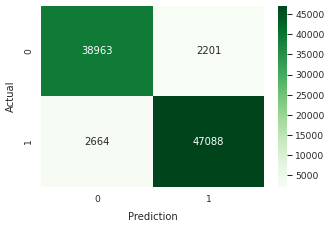

ROC curve:



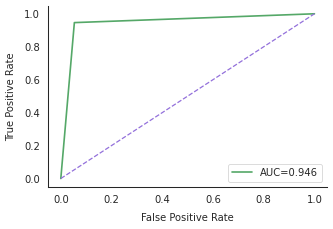

In [358]:
clf = VotingClassifier(estimators=[ 
    ('logit', LogisticRegression(random_state=2)),
    ('dt', DecisionTreeClassifier(random_state=2)),
    ('knn',  KNeighborsClassifier()),
    ('rf', RandomForestClassifier(random_state=2))
    ], voting='soft')

# create a pipeline that prepares the data and runs the model
preprocess_and_vc_pipeline = Pipeline([
        ('preparation', preprocess_pipeline),
        ('model', clf) ])

#get performance measures
f1_vc, precision_vc, recall_vc, accuracy_vc  = get_cross_eval_scores(preprocess_and_vc_pipeline, X_train_pre, y_train)

#perform 3-fold cross validation and return predictions made on each test fold
y_pred_vc = cross_val_predict(preprocess_and_vc_pipeline, X_train_pre, y_train, cv=3)

# plot confusion matrix by comparing predicitons to the actual targets
plot_confusion_matrix_(y_train, y_pred_vc)

# plot ROC curve and get ROC AUC score
auc_vc = plot_roc_curve_(y_train, y_pred_vc)

# 6. Model Comparison

In [143]:
#create a list with the model names
model = ['Logit','Decision Tree','KNN','Random Forest','Voting Clf']

#create a list with the scorings you want to compare your models on
scoring = ['f1','precision', 'recall', 'accuracy', 'auc']

#create a list with the scores
scores = [f1_logit, precision_logit, recall_logit, accuracy_logit, auc_logit,
          f1_dt, precision_dt, recall_dt, accuracy_dt,auc_dt,
          f1_knn, precision_knn, recall_knn,accuracy_knn,auc_knn,
          f1_rf, precision_rf, recall_rf,accuracy_rf,auc_rf,
          f1_vc, precision_vc, recall_vc, accuracy_vc, auc_vc]

#create empty list
model_list = []

#append the model list with dictionaries of model-scoring pairs
for i in model:
    for j in scoring:
        model_dic = {'Model': i,'Scoring':j}
        model_list.append(model_dic)

#convert to df
model_df = pd.DataFrame(model_list)

#add the score values
model_df['Score'] = scores


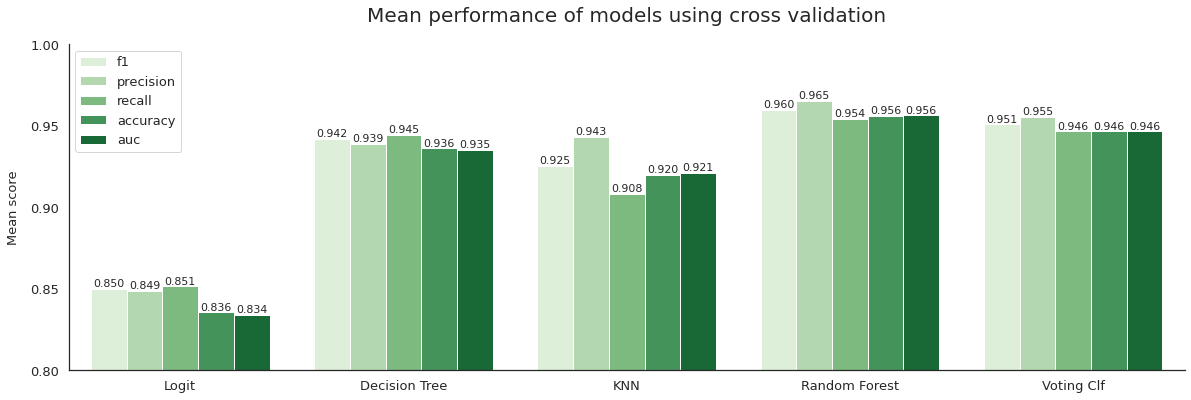

In [240]:
#set figure size
fig = plt.figure(figsize=[20,6])

#add title
plt.title('Mean performance of models using cross validation',fontsize=20, y = 1.05)

#create the barplot with the different scores of each model
ax = sns.barplot(x='Model',y='Score',data=model_df,hue='Scoring',palette='Greens')

#set aesthetic parameters
sns.set(style='white',font_scale=1)
sns.despine()

#format the legend and axis parameters for each subplot
plt.legend(loc="upper left",fontsize=13)
plt.ylim([0.8,1])
plt.yticks([0.8, 0.85, 0.90, 0.95, 1])
plt.xlabel('')
plt.ylabel('Mean score',fontsize=13,labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=13)

#format the bar labels
for bars in ax.containers:
        ax.bar_label(bars, fmt='%.3f',fontsize=11)

#show plot
plt.show()

On comparing the respective performance measures of all 5 classifiers, it is observed that the Random Forest Classifier has performed better than any of the other classifiers and it is followed by the Voting Classifier. 

Random Forest is an ensemble technique which works by training many different decision trees and then averaging out their predictions. Then, the output has improved accuracy compared to the individual trees.

As for the Voting Classifier, the output class is the class that gets the  highest probability, averaged over all the individual classifiers. It usually performs better than all the models it includes, however, in this case it only appears to work better than Logistic Regression, Decision Tree and KNN- not Random Forest.

Out of all the models, the Logistic Regression appears to be the most skeptical model and it has learned the worst from the training data.

Furthermore, when inspecting the confusion matrices of each classifier, it is observed that logistic regression and decision tree have lower false negatives than false positives, while the remaining classifiers had the opposite. Also, the Random Forest and the Voting Classifier have the hishest number of correct predictions of True Negative, which is what we are most interested in. 

It appears that each classifier learns something different from the training data, so I am hoping when I finetune the models that the Voting Classifier, which combines all the models, will provide very good results.

# 7. Fine Tuning

To finetune the models I am running GridSearchCV and RandomizedSearchCV algorithm with 3-fold corss validation to maximize the f1 score.
Before choosing the hyperparameter values I take a look on the hyperparameter values of the base models to get an idea of where in the feature space I should explore to better regularize the classifiers.

In [136]:
#create function to avoid repetition
def get_eval_scores(y_train,  y_pred):

    #calculate f1 score
    f1 = f1_score(y_train, y_pred)
    print("F1 Score: {:.3f}".format(f1)) 
    
    # calculate precision score
    precision = precision_score(y_train, y_pred)
    print("Precision: {:.3f}".format(precision))
    
    # calculate recall score
    recall = recall_score(y_train, y_pred)
    print("Recall: {:.3f}".format(recall))
    
    # calculate accuracy score
    accuracy = accuracy_score(y_train, y_pred) 
    print("Accuracy: {:.3f}".format(accuracy))
    
        
    return f1, precision, recall, accuracy

## 7.1 Logistic Regression

In [171]:
LogisticRegression(random_state=2).get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 2,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Since I am not sure what values a hyperparameter should have I am going to add a big range of values and I will perform subsequent fine-grained searchs based on the results of the previous search.


In [190]:
#setting parameter space
param_grid = {   
     'model__penalty' : ['l1', 'l2'], #the norm of the penalty
     'model__C' : [0.05, 0.1, 1, 5, 10], #inverse of regularization strength, the smaller the more regularization
     'model__max_iter' : [10, 50, 100, 200, 300, 500], #max number of iterations taken for the solvers to converge
     'model__solver': ['lbfgs','sag' ,'saga']  #algorithm to use in the optimization problem,
                                        #sag and saga are good for large datasets
}

# performing grid search
gs_logit = GridSearchCV(preprocess_and_logit_pipeline, param_grid = param_grid, cv = 3, n_jobs = -1, verbose =2,scoring='f1')

# cross validated gridsearch
gs_logit.fit(X_train_pre, y_train)

# print the best estimator with the best scoring hyperparameter param_grid
print(gs_logit.best_params_)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
{'model__C': 5, 'model__max_iter': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


It was found that the default penalty and solver are the best so I am not going to include those hyperparameters in the more refined gridsearch. 


In [208]:
# setting parameter space
param_grid = {   
     'model__C' : [2, 3, 4, 5, 6, 7, 8, 9], #inverse of regularization strength, the smaller the more regularization
     'model__max_iter' : [5, 10, 15, 20, 25, 30] #max number of iterations taken for the solvers to converge
}

# performing grid search
gs_logit_B = GridSearchCV(preprocess_and_logit_pipeline, param_grid, cv = 3, n_jobs = -1, verbose =2,scoring='f1')

# cross validated gridsearch
gs_logit_B.fit(X_train_pre, y_train)

# print the best estimator with the best scoring hyperparameter param_grid
print(gs_logit_B.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'model__C': 4, 'model__max_iter': 10}


Let's do a final GridSearch to find the best estimate for max iter:

In [128]:
# setting parameter space
param_grid = {   
     'model__C' : [4], #inverse of regularization strength, the smaller the more regularization
     'model__max_iter' : [6, 7, 8, 9, 10, 11, 12, 13, 14] #max number of iterations taken for the solvers to converge
}

# performing grid search
gs_logit_C = GridSearchCV(preprocess_and_logit_pipeline, param_grid, cv = 3, n_jobs = -1, verbose =2,scoring='f1')

# cross validated gridsearch
gs_logit_C.fit(X_train_pre, y_train)

# print the best estimator with the best scoring hyperparameter param_grid
print(gs_logit_C.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'model__C': 4, 'model__max_iter': 10}


Now that we have fine-tuned the model, let's evaluate it on the test set.

In [417]:
#predict on test set
y_pred_gs_logit_test = gs_logit_C.best_estimator_.predict(X_test_pre)

#get metric scores on test
f1_gs_logit_test, precision_gs_logit_test, recall_gs_logit_test, accuracy_gs_logit_test =  get_eval_scores( y_test, y_pred_gs_logit_test)



F1 Score: 0.851
Precision: 0.851
Recall: 0.852
Accuracy: 0.837


Let's also evaluate the model before finetuning on the test set.

In [196]:
#fit the pre-finetuned pipeline on train and predict on test
preprocess_and_logit_pipeline.fit(X_train_pre, y_train)
y_pred_logit_test = preprocess_and_logit_pipeline.predict(X_test_pre)

#get performance measures
f1_logit_test, precision_logit_test, recall_logit_test, accuracy_logit_test =  get_eval_scores( y_test, y_pred_logit_test)


F1 Score: 0.851
Precision: 0.852
Recall: 0.849
Accuracy: 0.837


## 7.2 Decision Tree

In [211]:
#parameters of our base random forest model
DecisionTreeClassifier(random_state=2).get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 2,
 'splitter': 'best'}

For the decision tree, since it has min 1 sample per leaf and 2 samples per split and None max depth, the nodes should be pure. Therefore, in an attempt to prevent overfitting the training data, I will explore higher mins and I will also try to regularize the max depth. Last, I am also exploring the number of features to consider when looking for the best split.

In [217]:
# setting parameter grid 
param_grid = {
    'model__min_samples_leaf': [1, 2, 3], # min number of samples required to be at a leaf node
    'model__max_depth': [None, 20, 40], # max number of levels in the decision tree
    'model__min_samples_split': [2, 3, 4], # min number of samples required to split an internal node
    'model__max_features': [None, 'auto', 'sqrt', 'log2']  #the number of features to consider when looking for the best split
}

# setting the grid search
gs_dt = GridSearchCV(preprocess_and_dt_pipeline, param_grid, cv=3,
                                 scoring='f1',verbose=2, n_jobs=4)

# performing grid search using 3-fold cross-validation
gs_dt.fit(X_train_pre, y_train)

# print the best kernel
print(gs_dt.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
{'model__max_depth': 20, 'model__max_features': None, 'model__min_samples_leaf': 3, 'model__min_samples_split': 2}


Since the chosen max features and min samples per split were the default ones, I am not going to add them in the subsequent GridSearches, and I am going to further finetune the min samples per leaf and max depth.

In [222]:
# setting parameter grid 
param_grid = {
    'model__min_samples_leaf': [3, 4, 5], # min number of samples required to be at a leaf node
    'model__max_depth': [12, 14, 16, 18, 20, 22, 24] # max number of levels in the decision tree
}

# setting the grid search
gs_dt_B = GridSearchCV(preprocess_and_dt_pipeline, param_grid, cv=3,
                                 scoring='f1',verbose=2, n_jobs=4)

# performing grid search using 3-fold cross-validation
gs_dt_B.fit(X_train_pre, y_train)

# print the best kernel
print(gs_dt_B.best_params_)

Fitting 3 folds for each of 21 candidates, totalling 63 fits
{'model__max_depth': 14, 'model__min_samples_leaf': 3}


In [223]:
# setting parameter grid 
param_grid = {
    'model__min_samples_leaf': [1,2,3], # min number of samples required to be at a leaf node
    'model__max_depth': [13, 14, 15] # max number of levels in the decision tree
}

# setting the grid search
gs_dt_C = GridSearchCV(preprocess_and_dt_pipeline, param_grid, cv=3,
                                 scoring='f1',verbose=2, n_jobs=4)

# performing grid search using 3-fold cross-validation
gs_dt_C.fit(X_train_pre, y_train)

# print the best kernel
print(gs_dt_C.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'model__max_depth': 14, 'model__min_samples_leaf': 1}


Now that I have regularized the decision tree, I am going to evaluate it on the test set before and after finetuning:

In [415]:
#predict on test set
y_pred_gs_dt_test = gs_dt_C.best_estimator_.predict(X_test_pre)

#get performance measures
f1_gs_dt_test, precision_gs_dt_test, recall_gs_dt_test, accuracy_gs_dt_test =  get_eval_scores( y_test, y_pred_gs_dt_test)


F1 Score: 0.949
Precision: 0.953
Recall: 0.945
Accuracy: 0.945


In [416]:
#fit the pre-finetuned pipeline on train and predict on test
preprocess_and_dt_pipeline.fit(X_train_pre, y_train)
y_pred_dt_test = preprocess_and_dt_pipeline.predict(X_test_pre)

#get performance measures
f1_dt_test, precision_dt_test, recall_dt_test, accuracy_dt_test =  get_eval_scores( y_test, y_pred_dt_test)



F1 Score: 0.946
Precision: 0.946
Recall: 0.945
Accuracy: 0.940


## 7.3 KNN

In [147]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

For the KNN, I am going to explore the number of neighbours, the weights and the metric.

In [218]:
# setting parameter grid
param_grid = {
    'model__n_neighbors': [5, 11, 15], #number of neighbours 
    'model__weights': ['uniform', 'distance'], #whether points in each neighborhood are weighted equally or based on the distance from query point
    'model__metric': ['euclidean', 'minkowski'] #the distance metric to use for the tree
}

# setting the grid search
gs_knn = GridSearchCV(preprocess_and_knn_pipeline, param_grid=param_grid, cv=3,
                                 scoring='f1', verbose=2, n_jobs=4)

# performing grid search using 3-fold cross-validation
gs_knn.fit(X_train_pre, y_train)

# print the best kernel
print(gs_knn.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'model__metric': 'euclidean', 'model__n_neighbors': 11, 'model__weights': 'distance'}


I am going to perform another finetuned grid search on the number of neighbours. Note that I pick odd numbers only since the there are only two output classes.

In [226]:
# setting parameter grid
param_grid = {
    'model__n_neighbors': [7,9,11,13], 
    'model__weights': ['distance'],
    'model__metric': ['euclidean'] 
}

# setting the grid search
gs_knn_B = GridSearchCV(preprocess_and_knn_pipeline, param_grid=param_grid, cv=3,
                                 scoring='f1', verbose=2, n_jobs=4)

# performing grid search using 3-fold cross-validation
gs_knn_B.fit(X_train_pre, y_train)

# print the best kernel
print(gs_knn_B.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'model__metric': 'euclidean', 'model__n_neighbors': 9, 'model__weights': 'distance'}


Next, I am going to evaluate the finetuned and the re-finetuned model on the test data:

In [412]:
#predict on test
y_pred_gs_knn_test = gs_knn_B.best_estimator_.predict(X_test_pre)

#get performance measures
f1_gs_knn_test, precision_gs_knn_test, recall_gs_knn_test, accuracy_gs_knn_test =  get_eval_scores( y_test, y_pred_gs_knn_test)

F1 Score: 0.931
Precision: 0.949
Recall: 0.914
Accuracy: 0.926


In [413]:
#fit the pre-finetuned pipeline on train and predict on test
preprocess_and_knn_pipeline.fit(X_train_pre, y_train)
y_pred_knn_test = preprocess_and_knn_pipeline.predict(X_test_pre)

#get performance measures
f1_knn_test, precision_knn_test, recall_knn_test, accuracy_knn_test =  get_eval_scores( y_test, y_pred_knn_test)

F1 Score: 0.929
Precision: 0.946
Recall: 0.912
Accuracy: 0.924


## 7.4 Random Forest

In [229]:
RandomForestClassifier(random_state=2).get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

Since I do not want the model to overfit the training data, I will try and increase the min samples per split and leaf as well as the number of trees in the forest. Also, I am going to explore the bootstrap hyperparameter and the max depth.

Because the Random Forest takes a long time to finetune, I chose to do an initial finetuning with RandomizedSearch because I wanted to explore a large hyperparameter space.

RandomizedSearch, in contrast to GridSearch, instead of trying out all possible combinations, it selects a random value for each hyperparameter at every iteration (random combinations) and allows more control over computing budget.

In [257]:
# setting parameter space
param_grid = { 
    'model__bootstrap': [True, False], # whether sampling is performed with replacement
    'model__min_samples_leaf': [1, 2, 3], # minimum number of samples required to be at a leaf node
    'model__min_samples_split': [2, 3, 4], # minimum number of samples required to split an internal node
    'model__n_estimators' : [100, 300, 500], # number of trees in the forest
    'model__max_depth': [20, 40, None] # maximum depth of the tree
}

# setting the grid search
rs_rf = RandomizedSearchCV(preprocess_and_rf_pipeline, param_grid, cv=3,
                                 scoring='f1',n_iter=50, verbose=2, n_jobs=4, random_state= 2)


# performing grid search using 3-fold cross-validation
rs_rf.fit(X_train_pre, y_train)

# print the best kernel
print(rs_rf.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'model__n_estimators': 500, 'model__min_samples_split': 4, 'model__min_samples_leaf': 1, 'model__max_depth': None, 'model__bootstrap': False}


The whole dataset will be used to build each tree and the min samples per split and leaf will be 2 and 1 respectively. Since 4  and 500 were the maximum values that were evaluated for min samples per split and estimators respectively, I search again with higher values (using gridsearch this time), because the f1 score may continue to improve.

In [258]:
# setting parameter space
param_grid = { 
    'model__bootstrap': [False], # whether sampling is performed with replacement
    'model__min_samples_split': [4, 5, 6, 7], # minimum number of samples required to split an internal node
    'model__n_estimators' : [400, 500, 600, 700] # max features on which the trees are trained 
}

# setting the grid search
gs_rf = GridSearchCV(preprocess_and_rf_pipeline, param_grid=param_grid, cv=3,
                                 scoring='f1', verbose=2, n_jobs=4)


# performing grid search using 3-fold cross-validation
gs_rf.fit(X_train_pre, y_train)

# print the best kernel
print(gs_rf.best_params_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'model__bootstrap': False, 'model__min_samples_split': 4, 'model__n_estimators': 500}


It was found that 4 and 500 were the desired min samples per split and number of estimators respsectively, so I will stop finetuning the random forest. Although we might be able to finetune the model further with respect to the number of estimators, 500 is good enough. The higher the number of estimators the longer it takes to run.

Next, I am going to evaluate the finetuned and the pre-finetuned model on the test data:

In [404]:
#predict on test
y_pred_rs_rf_test = gs_rf.best_estimator_.predict(X_test_pre)

#get performance measures
f1_rs_rf_test, precision_rs_rf_test, recall_rs_rf_test, accuracy_rs_rf_test =  get_eval_scores( y_test, y_pred_rs_rf_test)


F1 Score: 0.963
Precision: 0.970
Recall: 0.955
Accuracy: 0.959


In [265]:
#fit the pre-finetuned pipeline on train and predict on test
preprocess_and_rf_pipeline.fit(X_train_pre, y_train)
y_pred_rf_test = preprocess_and_rf_pipeline.predict(X_test_pre)

#get performance measures
f1_rf_test, precision_rf_test, recall_rf_test, accuracy_rf_test, auc=  get_eval_scores( y_test, y_pred_rf_test)


F1 Score: 0.961
Precision: 0.969
Recall: 0.953
Accuracy: 0.958
AUC: 0.958


## 7.5 Voting Classifier

To finetune the voting class, I am going to use the best GridSearch and RandomizedSearch hyperparameters in the models, and I am going to exlore whether soft or hard voting is better as well as different weights. Since I know that Random Forest performs the best and Logistic Regression the worst, I will assign more value to the the former and less to the latter.

In [133]:
clf_gs = VotingClassifier(estimators=[ 
    ('dt', DecisionTreeClassifier(max_depth= 14,random_state=2)),
    ('logit', LogisticRegression(C= 4, max_iter= 10, random_state=2)),
    ('rf', RandomForestClassifier(bootstrap= False, min_samples_split= 4, n_estimators= 500, random_state=2)),
    ('knn',  KNeighborsClassifier(metric= 'euclidean', n_neighbors= 9, weights= 'distance'))
    ], voting='soft')

preprocess_and_vc_pipeline = Pipeline([
        ('preparation', preprocess_pipeline),
        ('model', clf_gs) ])

param_grid = {'model__voting':['hard', 'soft'],
          'model__weights':[(1,0.5,2,1), (1,1,1,1), (0.5,0.5,2,0.5), (1.75,0.5,2,1)]}


# setting the grid search
gs_vc = GridSearchCV(preprocess_and_vc_pipeline, param_grid=param_grid, cv=3,
                                 scoring='f1', verbose=2, n_jobs=4)


# performing grid search using 3-fold cross-validation
gs_vc.fit(X_train_pre, y_train)

# print the best kernel
print(gs_vc.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'model__voting': 'hard', 'model__weights': (0.5, 0.5, 2, 0.5)}


Next, I am going to evaluate the finetuned and the re-finetuned model on the test data:

In [137]:
#predict on test
y_pred_gs_vc_test = gs_vc.best_estimator_.predict(X_test_pre)

#get performance measures
f1_gs_vc_test, precision_gs_vc_test, recall_gs_vc_test, accuracy_gs_vc_test =  get_eval_scores( y_test, y_pred_gs_vc_test)


F1 Score: 0.963
Precision: 0.970
Recall: 0.955
Accuracy: 0.959


In [400]:
#fit the pre-finetuned pipeline on train and predict on test
preprocess_and_vc_pipeline.fit(X_train_pre, y_train)
y_pred_vc_test = preprocess_and_vc_pipeline.predict(X_test_pre)

#get performance measures
f1_vc_test, precision_vc_test, recall_vc_test, accuracy_vc_test =  get_eval_scores( y_test, y_pred_vc_test)



F1 Score: 0.955
Precision: 0.962
Recall: 0.948
Accuracy: 0.951


# 8. Evaluate Base and Fine-Tuned Models on Test

In [263]:
model = ['Logit','Decision Tree','KNearest Neighbours','Random Forest','Voting Classifier' ]
scoring = ['f1 score (Base Model)','f1 score (Fine-tuned Model)']
scores = [f1_logit_test ,f1_gs_logit_test, f1_dt_test, f1_gs_dt_test , f1_knn_test,
          f1_gs_knn_test, f1_rf_test, f1_rs_rf_test,f1_vc_test,f1_gs_vc_test]
model_list = []

for i in model:
    for j in scoring:
        model_dic = {'Model': i,'Scoring':j}
        model_list.append(model_dic)

model_df = pd.DataFrame(model_list)

model_df['Score'] = scores


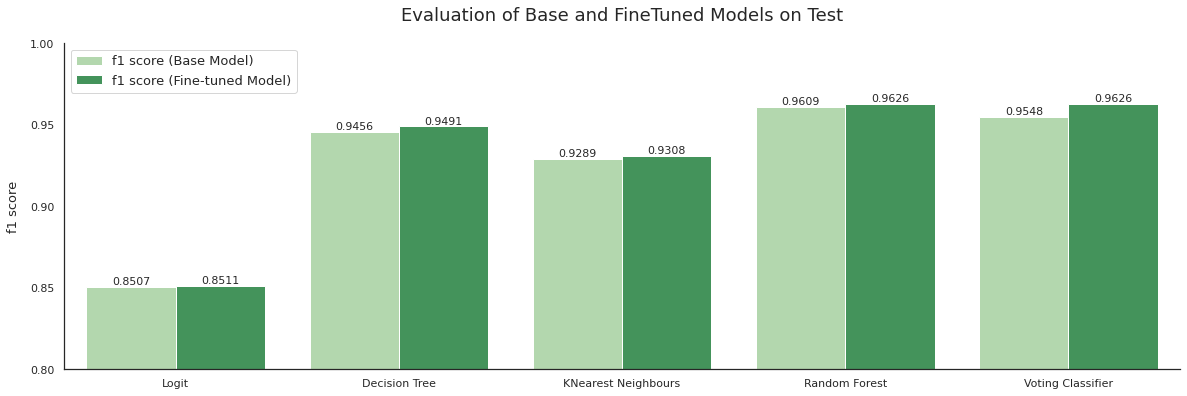

In [266]:
#set figure size
fig = plt.figure(figsize=[20,6])

#plot the graph
ax = sns.barplot(x='Model',y='Score',data=model_df,hue='Scoring',palette='Greens')

#set the legend, axis, title
plt.legend(loc="upper left",fontsize=13)
plt.ylim([0.8,1])
plt.yticks([0.8, 0.85, 0.90, 0.95, 1])
plt.xlabel('')
plt.ylabel('f1 score',fontsize=13,labelpad=10)
plt.title('Evaluation of Base and FineTuned Models on Test',fontsize=18, y = 1.05)

#set aesthetic parameters
sns.set(style='white',font_scale=1)
sns.despine()

#add bar labels
for bars in ax.containers:
        ax.bar_label(bars,fontsize=11, fmt='%.4f')



It is observed that all the models predict better the test data after finetuning. Out of all the classifiers, Random Forest and Voting Classifier perform the best (equal f1 scores).


In [420]:
#create a list with the model names
model = ['Logit','Decision Tree','KNN','Random Forest','Voting Clf']

#create a list with the scorings you want to compare your models on
scoring = ['f1','precision', 'recall', 'accuracy']

#create a list with the scores
scores = [f1_gs_logit_test, precision_gs_logit_test, recall_gs_logit_test, accuracy_gs_logit_test,
          f1_gs_dt_test, precision_gs_dt_test, recall_gs_dt_test, accuracy_gs_dt_test,
          f1_gs_knn_test, precision_gs_knn_test, recall_gs_knn_test,accuracy_gs_knn_test,
          f1_rs_rf_test, precision_rs_rf_test, recall_rs_rf_test,accuracy_rs_rf_test,
          f1_gs_vc_test, precision_gs_vc_test, recall_gs_vc_test, accuracy_gs_vc_test]

#create empty list
model_list = []

#append the model list with dictionaries of model-scoring pairs
for i in model:
    for j in scoring:
        model_dic = {'Model': i,'Scoring':j}
        model_list.append(model_dic)

#convert to df
model_df = pd.DataFrame(model_list)

#add the score values
model_df['Score'] = scores



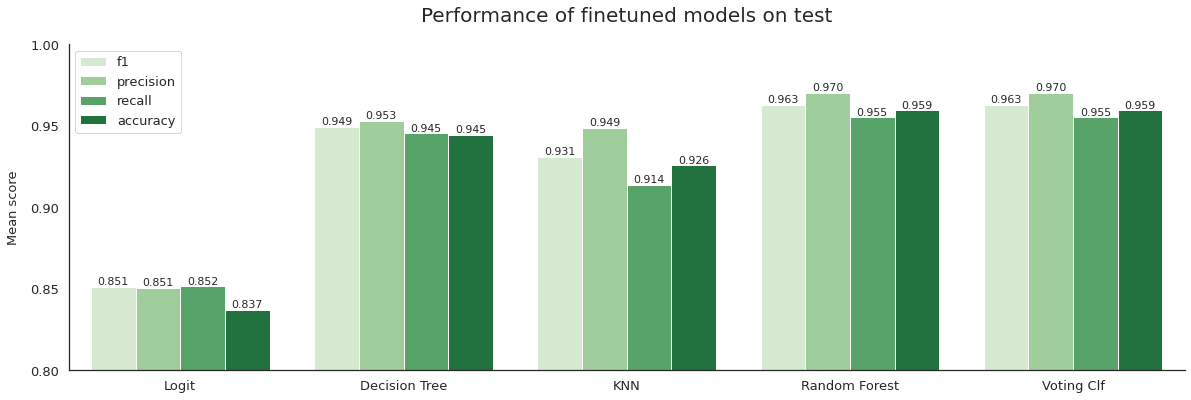

In [425]:
#set figure size
fig = plt.figure(figsize=[20,6])

#add title
plt.title('Performance of finetuned models on test',fontsize=20, y = 1.05)

#create the barplot with the different scores of each model
ax = sns.barplot(x='Model',y='Score',data=model_df,hue='Scoring',palette='Greens')

#set aesthetic parameters
sns.set(style='white',font_scale=1)
sns.despine()

#format the legend and axis parameters for each subplot
plt.legend(loc="upper left",fontsize=13)
plt.ylim([0.8,1])
plt.yticks([0.8, 0.85, 0.90, 0.95, 1])
plt.xlabel('')
plt.ylabel('Mean score',fontsize=13,labelpad=10)
plt.tick_params(axis='both', which='major', labelsize=13)

#format the bar labels
for bars in ax.containers:
        ax.bar_label(bars, fmt='%.3f',fontsize=11)

#show plot
plt.show()

Random Forest and Voting Classifier perform better across all measures, not just f1 score (however we care mostly about f1).

Let's inspect the confusion matrices to see the errors of each of the best two models:

Random Forest
Confusion Matrix:



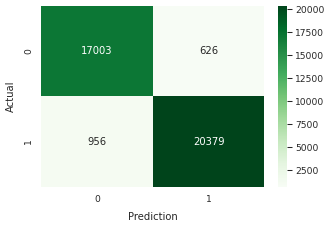

Voting Classifier
Confusion Matrix:



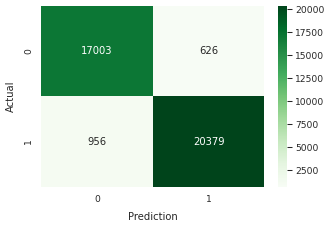

In [423]:
print('Random Forest')
plot_confusion_matrix_(y_test, y_pred_rs_rf_test)

print('Voting Classifier')
plot_confusion_matrix_(y_test, y_pred_gs_vc_test)


Because in the fine-tuned Voting Classifier the Random Forest had the highest weight compared to the rest, they now both appear to make the same errors so it does not matter which model of the two we pick.

Now, let's explore what features are most important when it comes to passenger satisfaction by looking at the feature importances of the random forest to understand which aspect of the services that the airline provides should be emphasized more to generate more satisfied customers. 


In [68]:
#derive the feature importances of fine tuned random forest
feature_importances = rs_rf.best_estimator_.steps[1][1].feature_importances_

#derive the feature names
feature_names=list(rs_rf.best_estimator_.steps[0][1].get_feature_names_out())

#change the way the features are written
feature_names = [name.replace('num__','').replace('cat__','').replace('_',' ') for name in feature_names]



In [380]:
#create a df with feature name and importance
feature_impt = pd.DataFrame({'features':feature_names,'importance':feature_importances})
feature_impt['importance'] = round(feature_impt['importance'],4)

#since the cat attributes were hot encoded I am adding their importances
new_rows = {'features': ['loyalty','type of travel','gender','class'], 
            'importance': [0.0284+0.0276,0.0205+0.0207,0.0229+0.0237,0.0260+0.0108+0.0019]}
new_rows = pd.DataFrame.from_dict(new_rows)

#append the df with the summed feature importance of categorical attributes and drop the onehot encoded ones
feature_impt =feature_impt.append([new_rows])
feature_impt =feature_impt.drop(feature_impt.index[17:26])

#sort values and reset index
feature_impt = feature_impt.sort_values(by=['importance'],ascending=True)
feature_impt.head()

,features,importance
6,inflight wifi service,0.0135
16,arrival delay,0.0163
5,gate location,0.0177
3,flight time convenient,0.0204
14,cleanliness,0.0230


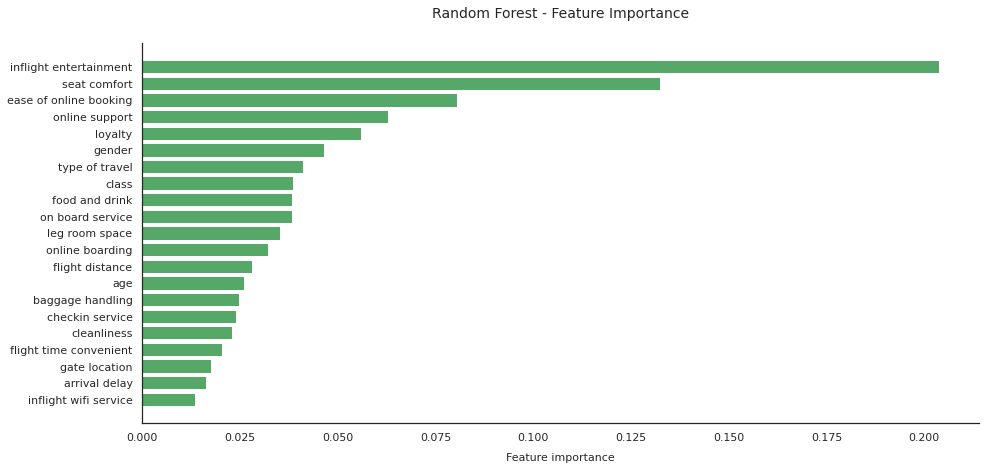

In [393]:
#set aesthetics of plot
sns.set(style='white',font_scale=1)

#set figure size
fig = plt.figure(figsize=[15,7])

#plot feature imortances
ax = plt.barh(feature_impt['features'],feature_impt['importance'],color='g')

#fix title and labels
plt.title('Random Forest - Feature Importance',fontsize=14, y = 1.05)
plt.xlabel('Feature importance',labelpad=10, fontsize=11)
plt.tick_params(axis='both', which='major', labelsize=11)


#remove the top and right spines from plots
sns.despine()




It appears that the top three priorities for the airline to achieve passenger satisfaction, is to focus on providing inflight entertainment, seat comfort, and make the online booking an easy process. Gate location, arrival delay and inflight wifi service, do not appear to play an important role.

# 9. Conclusion

To conclude, in this project I wanted to create a model that can predict the highest number of unsatisfied passengers with high precision. Out of all the models after they were finetuned, it was found that the Random Forest and the Voting Classifier perform equally good with an f1 score of 0.9626 = 96.26 %. Using that model, Invistico can detect the dissatisfied passengers with high precision and recall and target them appropriately to make them satisfied and prevent their churn.

Simultaneously, according to the results, Invistico should also focus to keep at high quality standards the inflight entertainment, the seat comfort and the ease of online booking if they want to maximize their satisfied passengers.
With more time, we could run more models, such as XGBoost or SVC and add them to the voting classifier to try and achieve even better performance. Also, we could try and use gridsearch to find optimal data preparation strategies, such as feature selection.

# References

(1) Ban, H. and Kim, H., 2019. Understanding Customer Experience and Satisfaction through Airline Passengers’ Online Review. Sustainability, 11(15), p.4066.

(2) Clemes, M. and Ghan, C., 2021. Customer Satisfaction Analysis of Restaurant Industry: An Empirical Study on Rangpur City. International Journal of Management and Accounting, pp.106-113.

(3) Pfeifer, P., 2005. The optimal ratio of acquisition and retention costs. Journal of Targeting, Measurement and Analysis for Marketing, 13(2), pp.179-188.

Géron, A. 2019. Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. 2nd ed. CA 95472: O’Reilly.